<a href="https://colab.research.google.com/github/brandondiazlopez/Small_ML_Project/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brandon Diaz-Lopez




In [ ]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn . model_selection import RepeatedKFold
from sklearn . model_selection import KFold
from sklearn . model_selection import cross_val_score
from sklearn . discriminant_analysis import LinearDiscriminantAnalysis
from sklearn . linear_model import LogisticRegression
from sklearn . neighbors import KNeighborsClassifier
from sklearn . naive_bayes import GaussianNB
from sklearn . svm import SVC
import matplotlib.pyplot as plt

# read and load the csv data file
filename = "myClassDataSet2.csv"
data = read_csv( filename )

This section was used to set up the proper libraries needed for the evaluation.

In [ ]:
# separate array into input and output components
array = data.values

X = array[:,0:10]
Y = array[:,10]

# Create RepeatedKFold object
rkf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=4)

# Create logistic regression model with liblinear solver
logreg = LogisticRegression(solver='liblinear')

# Perform cross-validation and compute accuracy
logreg.fit(X,Y)
accuracy = cross_val_score(logreg, X, Y, cv=10, scoring='accuracy')

# Compute and print mean accuracy
mean_accuracy = sum(accuracy) / len(accuracy)
print("Mean classification accuracy: ", mean_accuracy)

Mean classification accuracy:  0.9410000000000001


In this section the data is converted to an array to make it easier to perform model functions such as Repeated K fold, Logistic Regression and Cross Validation Score. 

The 10 folds essentially is running the model 10 times, training the model each fold, with the exception of the last fold, which will be used for the test. 

Having a Mean Classification Score of 0.941 means that the model is 94.1% accurate. Meaning it is a very accurate model.

In [ ]:
# reporting Accuracy, Neg Log Loss, and ROC AUC scores

accuracy_scores = cross_val_score(logreg, X, Y, cv=10, scoring='accuracy')
neglogloss_scores = cross_val_score(logreg, X, Y, cv=10, scoring='neg_log_loss')
rocauc_scores = cross_val_score(logreg, X, Y, cv=10, scoring='roc_auc')

print('Mean accuracy:', accuracy_scores.mean())
print('Mean negative log loss:', -neglogloss_scores.mean())
print('Mean ROC AUC:', rocauc_scores.mean())

Mean accuracy: 0.9410000000000001
Mean negative log loss: 0.1969084652481124
Mean ROC AUC: 0.9676273343359785


In this section, the Mean Accuracy score of 94.1 means that the model is extremely accurate.

 Having a  Mean Negative log loss score of 0.1969 means that there is a low chance for errors. The lower the score, the lower chance for error. 

For the Mean ROC AUC to be 0.9676 means that the model is nearly perfect. 

In [ ]:
# preparing linear and nonlinear models

models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

#Evaluating each model
results = []

names = []

for name, model in models: 
  kfold = KFold(n_splits=10, random_state=4, shuffle=True)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print("{}: mean accuracy:{}, \t std of accuracies:{}".format(name, cv_results.mean(), cv_results.std()))


LDA: mean accuracy:0.9318000000000002, 	 std of accuracies:0.005996665740225956
LR: mean accuracy:0.9409000000000001, 	 std of accuracies:0.0064412731660751415
KNN: mean accuracy:0.9353, 	 std of accuracies:0.008246817568007641
NB: mean accuracy:0.9418, 	 std of accuracies:0.005528109984434081
SVM: mean accuracy:0.9434999999999999, 	 std of accuracies:0.005590169943749448


For this section, we are trying to compare the accuracy of our algorithm. To do this, we will use several different classifications to compare it to. 

Based off of these scores, I would choose to run my model though SVM or NB, because they have the highest accuacies and the lowest standard deviations.

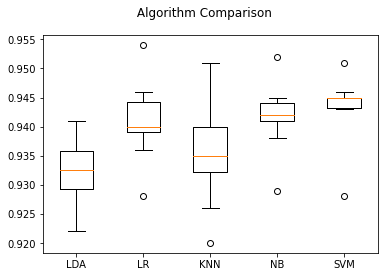

In [ ]:
fig = plt.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

For the previous section, I would have chosen SVM and NB to run my model off of. HOWEVER, based on this graph, I would choose LDA because there are no outliers and the data appears to be more normally distributed than the LR, KNN, NB and SVM.

In [ ]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn . model_selection import KFold
from sklearn . model_selection import cross_val_score
from sklearn . pipeline import Pipeline
from sklearn . pipeline import FeatureUnion
from sklearn . linear_model import LogisticRegression
from sklearn . decomposition import PCA
from sklearn . feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler

# read and load the csv data file
filename = "myClassDataSet2.csv"
dataframe = read_csv ( filename )
array = dataframe . values

# separate array into input and output components
X = array [:,0:10]
Y = array [:,10]

In [ ]:
# Step 1: Standarize the data
scaler = StandardScaler()

#Step 2: Extract the 3 features using PCA
pca = PCA(n_components=3)

# Step 3: Extract 6 features using SelectKBest
k_best = SelectKBest(k=6)

# Step 4: Combine features, extracted from two previous steps using FeatureUnion()
feature_union = FeatureUnion([("pca", pca), ("k_best", k_best)])

# Step 5: Learn a Logistic Regression using ‘liblinear’ solver.
logistic_regression = LogisticRegression(solver='liblinear')

# Create Pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('features', feature_union),
    ('logistic_regression', logistic_regression)
])

#Evaluate pipeline using Kfold Cross Val
Kfold = KFold(random_state=5, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuarcy Score:", results.mean())

Accuarcy Score: 0.9434999999999999


In this section we are creating a pipeline to automate standard workflows. Standard workfolws help the model overcome problems like data leakage. 

We first will standardize the model to eliminate bias and to improve model performance. Then we will use PCA to extract the top 3 principle components. Once that is done SelectKBest will pick the best 6 features for the target variable.

Feature union combines both of these exrtraction features. Then we will use Logistic Regression to make binary predicitons of our criteria.

Having a score of 0.9434 means that the model is 94.34% accurate. This average accuracy means that the model is really effective.

In [ ]:
# import necessary packages to the Jupyter notebook
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn . model_selection import KFold
from sklearn . model_selection import cross_val_score
from sklearn . ensemble import BaggingClassifier
from sklearn . ensemble import AdaBoostClassifier
from sklearn . ensemble import VotingClassifier
from sklearn . tree import DecisionTreeClassifier
from sklearn . linear_model import LogisticRegression
from sklearn . svm import SVC

# read and load the csv data file
filename = "myClassDataSet2.csv"
dataframe = read_csv ( filename )
array = dataframe . values

# separate array into input and output components
X = array [:,0:10]
Y = array [:,10]

In [ ]:
#setting up the Bagging Classifer 

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

tree = DecisionTreeClassifier()

num_trees = 100

model = BaggingClassifier(base_estimator=tree, n_estimators=num_trees, random_state=7)

results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy Score:", results.mean())

Accuracy Score: 0.9494999999999999


In this section, the goal is to boost the accuracy of our model. The Bagging Classifer takes multiple samples and trains those models for each sample. The accuracy score is the average of all of the samples pulled.

Again since we have this high of a score, it means that the model is very accurate.

In [ ]:
# AdaBoost Classification

adamodel = AdaBoostClassifier(n_estimators=num_trees, random_state=7)

results = cross_val_score(adamodel, X, Y, cv=kfold)

print("Accuracy Score:", results.mean())

Accuracy Score: 0.9454999999999998


In this section, we are using AdaBoost to boost our algorithm. This classifcation essentially combines weaker classifers into a stronger one. Having a score of 0.9454 means that the model is still predicting at a very high level. 

In [ ]:
# Creating Sub models

estimators = []

log_reg = LogisticRegression(solver ='liblinear')
estimators.append (('logistic', log_reg))

dtc = DecisionTreeClassifier()
estimators.append(('cart', dtc))

supp_vec = SVC(gamma='auto')
estimators.append(('svm', supp_vec))

# Creating the ensemble model

ensemble = VotingClassifier(estimators)

results = cross_val_score(ensemble, X, Y, cv=kfold)
print('mean estimate of classification accuracy', results.mean())

mean estimate of classification accuracy 0.9468


finally, we are using the voting classifer. This classifer combines the predictions from several algorithms. The classifer needs to make a couple models outside of your sub models. Then it uses the sub models to help predict your new data. Having an accuracy of 0.9468 means that the model is still effective.